In [10]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 1024)
import matplotlib.pyplot as plt
import random

import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten ,GlobalAveragePooling2D, BatchNormalization, Dropout, Dense
# from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
%matplotlib inline

from pathlib import Path


## tensorflow & Keras
import tensorflow as tf  

In [11]:
train_labels = pd.read_csv('../input/arabic-hwr-ai-pro-intake1/train.csv')
train_images = Path(r'../input/arabic-hwr-ai-pro-intake1/train')

test_labels = pd.read_csv('../input/arabic-hwr-ai-pro-intake1/test.csv')
test_images = Path(r'../input/arabic-hwr-ai-pro-intake1/tets')
## read these all training images paths as Series
train_images_paths = pd.Series(sorted(list(train_images.glob(r'*.png'))), name='Filepath').astype(str)
train_images_paths.head()


0    ../input/arabic-hwr-ai-pro-intake1/train/00000...
1    ../input/arabic-hwr-ai-pro-intake1/train/00001...
2    ../input/arabic-hwr-ai-pro-intake1/train/00002...
3    ../input/arabic-hwr-ai-pro-intake1/train/00003...
4    ../input/arabic-hwr-ai-pro-intake1/train/00004...
Name: Filepath, dtype: object

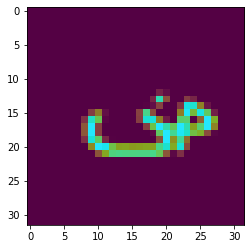

In [12]:
import cv2 
img = cv2.imread(train_images_paths.iloc[29])[:,:,:3]
# img = cv2.dilate(img,(5,5)) 
# img3_gr = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# im_e,binary = cv2.threshold(img3_gr,100,100,cv2.THRESH_BINARY_INV)
# binary.reshape(32,32,1).shape
plt.imshow(img)
# plt.imshow(img)


In [ ]:

# plt.imshow(train_full_set[29],cmap='gray')
# # train_labels['label'][29]
# # train_full_set[0].shape

In [ ]:
img_key_value = {}
for value in train_labels['label'].unique():
    img_key_value[value] = train_labels[train_labels['label']==value].index[0]
    
img_index = list(img_key_value.values())
img_label = list(img_key_value.keys())

fig, ax = plt.subplots(4, 7, figsize=(12, 8))

i = 0
for row in range(4):
    for col in range(7):
        plt.sca(ax[row, col])
        plt.title(f'label = {img_label[i]}')
        img = plt.imread(train_images_paths.iloc[img_index[i]])
        plt.imshow(img[:,:,:3])
        plt.axis('off')
        i+=1

In [ ]:
print('Number of Instances in train_set =>', len(train_images_paths))
print('Number of Instances in train_labels =>', len(train_labels))


print(train_images_paths.shape[0])

img = plt.imread(train_images_paths.iloc[img_index[0]])
print('shape of each Image is =>', img.shape)

In [13]:
train_full_labels = train_labels['label'].values
train_full_set = np.empty((train_images_paths.shape[0], 32, 32,3), dtype=np.float32)  #take only the first 3 channels

for idx, path in enumerate(train_images_paths):
    img = cv2.imread(path)
    img = img[:,:,:3]
#     img = cv2.dilate(img,(5,5)) 
#     img3_gr = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#     im_e,binary = cv2.threshold(img3_gr,100,100,cv2.THRESH_BINARY_INV)
#     img = img/img.max()
    train_full_set[idx] = img
    
print('train_full_set.shape =>', train_full_set.shape)
print('train_full_labels.shape =>', train_full_labels.shape)

train_full_set.shape => (13440, 32, 32, 3)
train_full_labels.shape => (13440,)


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# def rgb2gray(rgb):
#     return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

# img = mpimg.imread(train_images_paths[0])[:,:,:3]     
# gray = rgb2gray(img)    
# plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
# plt.show()
# img.shape

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(train_full_set, train_full_labels, 
                                                      test_size=0.2, shuffle=True, random_state=42)

print('X_train.shape =>', X_train.shape)
print('X_valid.shape =>', X_valid.shape)
print('y_train.shape =>', y_train.shape)
print('y_valid.shape =>', y_valid.shape)

In [ ]:
def encoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
#     conv1 =  Dropout(0.2)(conv1)
    conv1 = BatchNormalization()(conv1)
#     conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
#     conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
#     conv2 =  Dropout(0.2)(conv2)
    conv2 = BatchNormalization()(conv2)
#     conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
#     conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
#     conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)
#     conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
#     conv3 =  Dropout(0.2)(conv3)
    conv3 = BatchNormalization()(conv3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 256 (small and thick)
#     conv4 =  Dropout(0.2)(conv4)
    conv4 = BatchNormalization()(conv4)
#     conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
#     conv4 = BatchNormalization()(conv4)
    return conv4

def decoder(conv4):    
    #decoder
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4) #7 x 7 x 128
#     conv5 =  Dropout(0.2)(conv5)
    conv5 = BatchNormalization()(conv5)
#     conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv5)
#     conv5 = BatchNormalization()(conv5)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv5) #7 x 7 x 64
#     conv6 =  Dropout(0.2)(conv6)
    conv6 = BatchNormalization()(conv6)
#     conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv6)
#     conv6 = BatchNormalization()(conv6)
    up1 = UpSampling2D((2,2))(conv6) #14 x 14 x 64
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 32
#     conv7 =  Dropout(0.2)(conv7)
    conv7 = BatchNormalization()(conv7)
#     conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv7)
#     conv7 = BatchNormalization()(conv7)
    up2 = UpSampling2D((2,2))(conv7) # 28 x 28 x 32
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
    return decoded

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense,UpSampling2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras import regularizers
from matplotlib import pyplot
from tensorflow.keras.optimizers import Adadelta, RMSprop,SGD,Adam

# define dataset
input_img = Input(shape = (32,32,3))
autoencoder = Model(input_img, decoder(encoder(input_img)))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())


In [ ]:

# X_train, X_test, y_train, y_test = train_test_split(train_full_set, train_full_set, test_size=0.33, random_state=1)
# autoencoder_train = autoencoder.fit(X_train, y_train, batch_size=128,epochs=100,verbose=1,validation_data=(X_test, y_test))


In [ ]:
def fc(enco):
    flat = Flatten()(enco)
    den = Dense(128, activation='relu')(flat)
#     den = Dense(128, activation='relu')(den)
    out = Dense(29, activation='softmax')(den)
    return out

In [ ]:
# autoencoder.save_weights('autoencoder.h5')

In [ ]:
# encode = encoder(input_img)
# full_model = Model(input_img,fc(encode))
# for l1,l2 in zip(full_model.layers[:10],autoencoder.layers[0:10]):
#     l1.set_weights(l2.get_weights())

In [ ]:
# for layer in full_model.layers[0:10]:
#     layer.trainable = False
# full_model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])


In [ ]:
# X_train,X_test,y_train,y_test = train_test_split(train_full_set, train_full_labels,test_size=0.2,random_state=13)

# classify_train = full_model.fit(X_train,y_train, batch_size=64,epochs=100,verbose=1,validation_data=(X_test, y_test))
# # # 

In [ ]:
# train_X,valid_X,train_label,valid_label = train_test_split(train_full_set, train_full_labels,test_size=0.2,random_state=13)


In [ ]:
IMG_SIZE = 16
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(IMG_SIZE, IMG_SIZE),
  tf.keras.layers.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
    
])

In [ ]:
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=True):
  # Resize and rescale all datasets.
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y), 
              num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)

  # Batch all datasets.
  ds = ds.batch(batch_size)

  # Use data augmentation only on the training set.
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), 
                num_parallel_calls=AUTOTUNE)

  # Use buffered prefetching on all datasets.
  return ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(train_full_set, train_full_labels,stratify=train_full_labels, test_size=0.3,random_state=13)
X_train = prepare(X_train)
X_test = prepare(X_test)


In [27]:
# Designing Model Architecture l-net 5
from keras.models import Sequential
from keras.layers import Conv2D,Rescaling,Resizing,RandomFlip,RandomRotation,Activation,ReLU, MaxPooling2D,AveragePooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense , Flatten

# def create_model(optimizer='adam', kernel_initializer='he_normal', activation='relu'):
# create model
X_train,X_test,y_train,y_test = train_test_split(train_full_set, train_full_labels,stratify=train_full_labels, test_size=0.3,random_state=13)

model = Sequential()
# model.add(Resizing(16, 16))
model.add(Rescaling(1./255))
# model.add(RandomFlip("horizontal_and_vertical"))
# model.add(RandomRotation(0.2))
model.add(Conv2D(filters=64, kernel_size=3,kernel_initializer='glorot_uniform',  strides=(1, 1), padding='same', input_shape=(32,32,3)))
model.add(BatchNormalization(epsilon=1e-05, momentum=0.05))
model.add(ReLU())
# model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=3,kernel_initializer='glorot_uniform',  strides=(1, 1), padding='same'))
model.add(BatchNormalization(epsilon=1e-05, momentum=0.05))
model.add(ReLU())

# model.add(Conv2D(filters=128, kernel_size=3,kernel_initializer='glorot_uniform',  strides=(1, 1), padding='same'))
# model.add(BatchNormalization(epsilon=1e-05, momentum=0.05))
# model.add(ReLU())

# model.add(Conv2D(filters=128, kernel_size=3,kernel_initializer='glorot_uniform',  strides=(1, 1), padding='same'))
# model.add(BatchNormalization(epsilon=1e-05, momentum=0.05))
# model.add(ReLU())

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters=128, kernel_size=3,kernel_initializer='glorot_uniform',  strides=(1, 1), padding='same'))
model.add(BatchNormalization(epsilon=1e-05, momentum=0.05))
model.add(ReLU())

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

# model.add(Conv2D(filters=128, kernel_size=3,kernel_initializer='glorot_uniform',  strides=(1, 1), padding='same'))
# model.add(BatchNormalization(epsilon=1e-05, momentum=0.05))
# model.add(ReLU())

model.add(Conv2D(filters=256, kernel_size=3,kernel_initializer='glorot_uniform',  strides=(1, 1), padding='same'))
model.add(BatchNormalization(epsilon=1e-05, momentum=0.05))
model.add(ReLU())

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))


# model.add(Conv2D(filters=256, kernel_size=3,kernel_initializer='glorot_uniform',  strides=(1, 1), padding='same'))
# model.add(BatchNormalization(epsilon=1e-05, momentum=0.05))
# model.add(ReLU())

# model.add(Conv2D(filters=256, kernel_size=3,kernel_initializer='glorot_uniform',  strides=(1, 1), padding='same'))
# model.add(BatchNormalization(epsilon=1e-05, momentum=0.05))
# model.add(ReLU())

# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(Dropout(0.2))

model.add(Conv2D(filters=512, kernel_size=3,kernel_initializer='glorot_uniform',  strides=(1, 1), padding='valid'))
model.add(BatchNormalization(epsilon=1e-05, momentum=0.05))
model.add(ReLU())

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))
# not needed
# model.add(Conv2D(filters=2048, kernel_size=1,kernel_initializer='glorot_uniform',  strides=(1, 1), padding='valid'))
# model.add(BatchNormalization(epsilon=1e-05, momentum=0.05))
# model.add(ReLU())

# model.add(Conv2D(filters=256, kernel_size=1,kernel_initializer='glorot_uniform',  strides=(1, 1), padding='valid'))
# model.add(BatchNormalization(epsilon=1e-05, momentum=0.05))
# model.add(ReLU())

# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(Dropout(0.2))

# model.add(Conv2D(filters=256, kernel_size=3,kernel_initializer='glorot_uniform',  strides=(1, 1), padding='same'))
# model.add(BatchNormalization(epsilon=1e-05, momentum=0.05))
# model.add(ReLU())

#Fully connected final layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
# model.add(Dense(84, activation='relu'))
model.add(Dense(29, activation='softmax'))

# Compile model
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='Adam')
# return model

model.fit(X_train, y_train, 
                validation_data=(X_test, y_test),
                epochs=70, batch_size=32, verbose=1)

Epoch 1/70
 81/294 [=======>......................] - ETA: 59s - loss: 2.4794 - accuracy: 0.2654

KeyboardInterrupt: 

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
re_lu_8 (ReLU)               (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
re_lu_9 (ReLU)               (None, 32, 32, 128)       0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 128)      

In [ ]:
y_preds_classes = np.argmax(model.predict(train_full_set), axis=-1)


In [ ]:
train_labels['pred']=  y_preds_classes

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(train_labels['label'],train_labels['pred'])

In [ ]:
# Designing Model Architecture l-net 5
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense , Flatten

# def create_model(optimizer='adam', kernel_initializer='he_normal', activation='relu'):
# create model
X_train,X_test,y_train,y_test = train_test_split(train_full_set, train_full_labels,stratify=train_full_labels, test_size=0.3,random_state=13)

model = Sequential()
model.add(Conv2D(filters=6, kernel_size=5, padding='valid', input_shape=(32,32,3), activation='relu'))
# model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=2))


model.add(Conv2D(filters=16, kernel_size=3, padding='valid', activation='relu'))
# model.add(BatchNormalization())
model.add(Dropout(0.2))
# model.add(Conv2D(filters=32, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=3, padding='valid', activation='relu'))
model.add(Dropout(0.2))
# model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Dropout(0.2))
# model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=2))

# model.add(Conv2D(filters=120, kernel_size=5, padding='same', activation='relu'))
# # model.add(BatchNormalization())
# model.add(Dropout(0.4))

# model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.2))

# model.add(Conv2D(filters=120, kernel_size=5, padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(AveragePooling2D(pool_size=2))
# model.add(Dropout(0.2))
# model.add(GlobalAveragePooling2D())
model.add(Conv2D(filters=, kernel_size=1, padding='same', activation='relu'))

#Fully connected final layer
# model.add(Flatten())
# model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(29, activation='softmax'))

# Compile model
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='Adam')
# return model

# model.fit(X_train, y_train, 
#                 validation_data=(X_test, y_test),
#                 epochs=100, batch_size=128, verbose=1)

In [ ]:
model.summary()

In [ ]:
# # Model Summary And Visualization

# model = create_model()
# # model.summary()

In [ ]:
# Designing Model Architecture
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense , Flatten
X_train,X_test,y_train,y_test = train_test_split(train_full_set, train_full_labels,test_size=0.2,random_state=13)

# def create_model(optimizer='adam', kernel_initializer='he_normal', activation='relu'):
# create model
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, padding='same', input_shape=(32,32,1), kernel_initializer='he_normal', activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))


model.add(Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer='he_normal', activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal', activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal', activation='relu'))
model.add(Dropout(0.4))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.2))
# model.add(GlobalAveragePooling2D())

#Fully connected final layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(29, activation='softmax'))

# Compile model
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='Adam')
# return model

model.fit(X_train, y_train, 
                validation_data=(X_test, y_test),
                epochs=100, batch_size=64, verbose=1)

In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file="model.png", show_shapes=True)
from IPython.display import Image as IPythonImage
display(IPythonImage('model.png'))

In [ ]:

# Parameters Tuning
# We will tune the parameters optimizer, kernel_initializer and activation.

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# define the grid search parameters
optimizer = ['RMSprop', 'Adam', 'Adagrad', 'Nadam']
kernel_initializer = ['normal', 'uniform']
activation = ['relu', 'linear', 'tanh']

param_grid = dict(optimizer=optimizer, kernel_initializer=kernel_initializer, activation=activation)

# count number of different parameters values combinations
parameters_number = 1
for x in param_grid:
  parameters_number = parameters_number * len(param_grid[x]) 
print("Number of different parameter combinations = {}".format(parameters_number))

In [20]:

# # We will try different models with different parameters to find the best parameter values.

# epochs = 5
# batch_size = 20 # 20 divides the training data samples

# #creating the models with different hyperparameters
# for a,b,c in [(x,y,z) for x in optimizer for z in activation for y in kernel_initializer]:
#     params = {'optimizer' : a , 'kernel_initializer' : b , 'activation' : c}
#     print(params)
#     curr_model = create_model(a, b, c)
#     curr_model.fit(X_train, y_train, 
#                     validation_data=(X_valid, y_valid),
#                     epochs=epochs, batch_size=batch_size, verbose=1)
#     print("=============================================================================")

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu',input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', ),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(29, activation='softmax')
 
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopp = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), 
                    epochs=10, batch_size=32, callbacks=[early_stopp])

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10, 6));

In [ ]:
loss_all_data, acc_all_data = model.evaluate(train_full_set, train_full_labels, verbose=0)
print('loss_all_data =>', loss_all_data)
print('acc_all_data =>', acc_all_data)

In [21]:
test_labels = pd.read_csv('../input/arabic-hwr-ai-pro-intake1/test.csv')
test_images = Path(r'../input/arabic-hwr-ai-pro-intake1/test')

## read these all training images paths as Series
test_images_paths = pd.Series(sorted(list(test_images.glob(r'*.png'))), name='Filepath').astype(str)

test_images_paths.head()



0    ../input/arabic-hwr-ai-pro-intake1/test/00000.png
1    ../input/arabic-hwr-ai-pro-intake1/test/00001.png
2    ../input/arabic-hwr-ai-pro-intake1/test/00002.png
3    ../input/arabic-hwr-ai-pro-intake1/test/00003.png
4    ../input/arabic-hwr-ai-pro-intake1/test/00004.png
Name: Filepath, dtype: object

In [ ]:
print('Number of Instances in test_set is', len(test_images_paths))

In [22]:
test_full_set = np.empty((3360, 32, 32, 3), dtype=np.float32)  #take only the first 3 channels

for idx, path in enumerate(test_images_paths):
    img = cv2.imread(path)
    img = img[:,:,:3]
#     img = cv2.dilate(img,(5,5)) 
#     img3_gr = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#     im_e,binary = cv2.threshold(img3_gr,100,100,cv2.THRESH_BINARY_INV)
#     img = img/img.max()
    test_full_set[idx] = img
    
print('test_full_set.shape =>', test_full_set.shape)

test_full_set.shape => (3360, 32, 32, 3)


In [23]:
y_preds_classes = np.argmax(model.predict(test_full_set), axis=-1)
test_labels['label'] = y_preds_classes

In [24]:
test_labels[['label']].value_counts()

label
10       130
22       128
3        124
16       124
4        123
1        121
2        121
27       121
20       121
19       121
15       121
6        121
12       120
13       120
5        120
11       119
24       119
23       119
21       119
7        118
18       118
14       118
17       117
26       117
8        116
28       116
9        114
25       114
dtype: int64

In [ ]:

plt.imshow()

In [ ]:
img_key_value = {}
for value in test_labels['label'].unique():
    img_key_value[value] = test_labels[test_labels['label']==value].index[0]
    
img_index = list(img_key_value.values())
img_label = list(img_key_value.keys())

fig, ax = plt.subplots(4, 7, figsize=(12, 8))

i = 0
for row in range(4):
    for col in range(7):
        plt.sca(ax[row, col])
        plt.title(f'label = {i}')
        img = plt.imread(test_images_paths.iloc[i])
        plt.imshow(img[:,:,:3])
        plt.axis('off')
        i+=1

In [26]:

test_labels[['id', 'label']].to_csv('/kaggle/working/submission.csv', index=False)